**Install dependencies**

In [1]:
# %%capture
# # Install the latest versions of the Pillow, fastai, numpy, pandas, and kaggle packages
# !pip install -U Pillow
# !pip install -U fastai
# !pip install -U numpy
# !pip install -U pandas
# !pip install -U kaggle

# # Install the latest versions of the Beautiful Soup cloudscraper packages
# !pip install -U beautifulsoup4
# !pip install -U cloudscraper

**Import dependencies**

In [2]:
# Import the random, pathlib, and PIL modules
import random
from pathlib import Path
from PIL import Image

# Import the get_image_files function from the fastai vision module
from fastai.vision.all import get_image_files

# Import the pandas package
import pandas as pd

# Set the max column width to None
pd.set_option('max_colwidth', None)

# Set the max number of rows and columns to None
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Import the BeautifulSoup and cloudscraper modules
from bs4 import BeautifulSoup
import cloudscraper

# Import the BytesIO class from the io module
from io import BytesIO

# Import the numpy package
import numpy as np

**Define path to image attribute data**

In [3]:
# Set the file path for the attributes dataframe
attributes_df_json_file = 'attributes_df.json'

# Print the file path
print(attributes_df_json_file)

attributes_df.json


**Import image attributes**

In [4]:
# Read the attributes dataframe from the JSON file
attributes_df = pd.read_json(attributes_df_json_file)

# Print the number of entries in the dataframe
print(f"Number of entries: {len(attributes_df)}")

# Display the first few rows of the dataframe
attributes_df.head()

Number of entries: 110715


title  aspect_ratio  \
3186010       Pink and White Ice Cream Neon Signage      0.749809   
3185509        Garnishing of Syrup on a Cheesecake       1.000000   
3182800            People in Front of the Computers      1.498501   
3184308          Photo Of People Next To Each Other      1.500000   
3185747  Aerial View of Coconut Trees at Rural Area      1.499795   

              main_color  \
3186010    [128, 38, 77]   
3185509  [185, 167, 164]   
3182800  [176, 175, 169]   
3184308  [201, 179, 150]   
3185747  [154, 139, 128]   

                                                         colors  \
3186010  [#000000, #a52a2a, #bc8f8f, #c71585, #d02090, #d8bfd8]   
3185509           [#000000, #696969, #bc8f8f, #cd5c5c, #d3d3d3]   
3182800           [#000000, #696969, #a9a9a9, #add8e6, #f5f5f5]   
3184308           [#708090, #a0522d, #cd853f, #eedd82, #ffdab9]   
3185747                                      [#696969, #808080]   

                                                                                                                                                                                                                                                                                                                                                                 tags  \
3186010  [bright, chocolate, close-up, cold, cream, creamy, cup, dairy product, delicious, design, dessert, electricity, epicure, flavors, fluorescent, food, food photography, goody, hand, ice cream, icecream, illuminated, indulgence, light pink background, neon, neon lights, neon sign, pastry, pink background, pink wallpaper, scoop, sweet, sweets, tasty]   
3185509                                                                                                                                                                                                               [cheesecake, dessert, epicure, food photography, food plating, food porn, food preparation, food styling, garnishing, gastronomy, glaze, syrup]   
3182800                                                                                                                      [colleagues, computer, connection, cooperation, desk, dreadlocks, employees, facial expression, furniture, indoors, internet, looking, office, people, room, sit, sitting, table, teamwork, technology, women, work, working, workplace]   
3184308                                                                                                                                                      [adults, casual, communication, conversation, fashion, fashionable, fun, gather, gathered, gathering, happiness, happy, leisure, outfit, recreation, sit, sitting, smile, smiling, style, stylish, wear]   
3185747                                                                                                                                                                                                                              [aerial shot, coconut trees, daylight, drone shot, exotic, high angle shot, outdoors, palm trees, sand, summer, trees, tropical]   

                 adult  aperture    camera  focal_length  \
3186010  very_unlikely       1.8  iPhone X          4.00   
3185509  very_unlikely       NaN                     NaN   
3182800       unlikely       NaN      None           NaN   
3184308       unlikely       NaN      None           NaN   
3185747           None       2.6    FC1102          4.49   

                     google_place_id    iso  latitude   longitude  \
3186010  ChIJkUjxJ7it1y0R4qOVTbWHlR4   40.0 -7.746914  113.226906   
3185509                         None    NaN       NaN         NaN   
3182800                         None    NaN       NaN         NaN   
3184308                         None    NaN       NaN         NaN   
3185747                         None  100.0       NaN         NaN   

        manufacturer        medical  orientation      racy shutter_speed  \
3186010        Apple  very_unlikely     

**Get unique tags**

In [5]:
# Extract the unique tags from the DataFrame and convert them to a list
tags = attributes_df['tags'].explode().unique().tolist()

# Print the number of unique tags
print(f"Unique Tags: {len(tags)}")

# Display the first few tags using a DataFrame
pd.DataFrame(tags).head()

Unique Tags: 21243


0
0     bright
1  chocolate
2   close-up
3       cold
4      cream

**Select a tag**

In [6]:
# Choose a random tag from the list of tags
# tag_term = random.choice(tags)

# Manually choose a tag
tag_term = 'golden hour'

# Print the chosen tag
tag_term

'golden hour'

**Search dataset for a specific tag**

In [7]:
# Create a mask for the attributes_df dataframe to identify rows where the 'tags' column contains the search term
mask = attributes_df.tags.apply(lambda x: tag_term in x if x is not None else False)

# Create a new dataframe containing only the rows that match the mask
results_df = attributes_df[mask]

# Print the number of rows in the resulting dataframe
print(f"Found {len(results_df)} entries")

# Display the first few rows of the resulting dataframe
results_df.head()

Found 1316 entries


title  \
3157917                              Photo Of Sunset During Dawn   
3150702  Aerial Photography of City Buildings During Golden Hour   
3157967                              Calm Sea During Golden Hour   
3170887                        Photo of Trees During Golden Hour   
3163677    Photo Of People In Front Of Mosque During Golden Hour   

         aspect_ratio       main_color                                colors  \
3157917      1.333234   [152, 118, 96]           [#000000, #deb887, #e9967a]   
3150702      0.669421   [137, 102, 94]  [#000000, #696969, #ff7f50, #ffa07a]   
3157967      1.500000   [119, 107, 97]                    [#000000, #faebd7]   
3170887      0.666667  [142, 140, 132]                    [#000000, #dcdcdc]   
3163677      1.509804   [189, 145, 91]           [#8b4513, #deb887, #faebd7]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            tags  \
3157917                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [afterglow, calm, dawn, dusk, environment, golden hour, horizon, idyllic, nature, nature photography, ocean, peaceful, ripples, scenery, scenic, sea, seascape, sun, sunbeam, sunrise, sunset, tranquil]   
3150702                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              [city, dawn, dusk, fog, foggy, golden hour, hills, morning, scenery, scenic, silhouette, sky, sunrise, sunset, urban, view]   
3157967                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [clouds, dawn, dusk, golden hour, horizon, islands, ocean, outdoors, rock formation, sea, seashore, shore, sky, sunrise, sunset, travel, water]   
3170887                                                                                                                                                                                                                                                                                                                                          

**Get image IDs from search results**

In [8]:
# Retrieve a list of the image IDs for the entries in the results_df dataframe
results_df_img_ids = results_df.index.to_list()

# Print the first image ID in the list
print(results_df_img_ids[0])

3157917


**Select an image ID**

In [9]:
# Choose a random image ID from the list of image IDs in the results_df dataframe
results_img_id = random.choice(results_df_img_ids)

# Print the chosen image ID
print(results_img_id)

1673992


**Define scraper object**

In [10]:
# Create an instance of a CloudScraper object
scraper = cloudscraper.create_scraper()

**Define function to download an image from Pexels**

In [11]:
def download_img(img_id, scraper):
    # Define the URL to download the image with the specified image ID
    url = f"https://www.pexels.com/photo/{img_id}/download/"

    # Use the scraper to make a GET request to the URL
    page_resp = scraper.get(url)
    
    try:
        # Attempt to open the downloaded content as an image using the BytesIO class
        dl_img = Image.open(BytesIO(page_resp.content))
        
        # If the image was successfully opened, return it.
        return dl_img
    except:
         # If an error occurred while trying to open the image, print a message and return `None`.
        print("Download failed!")
        return None    

**Download selected image**

In [12]:
# Download the image with the specified image ID
dl_img = download_img(results_img_id, scraper)

**Display the downloaded image**

Title: Mountain Peak With Clouds
Dimensions: (3216, 2136)


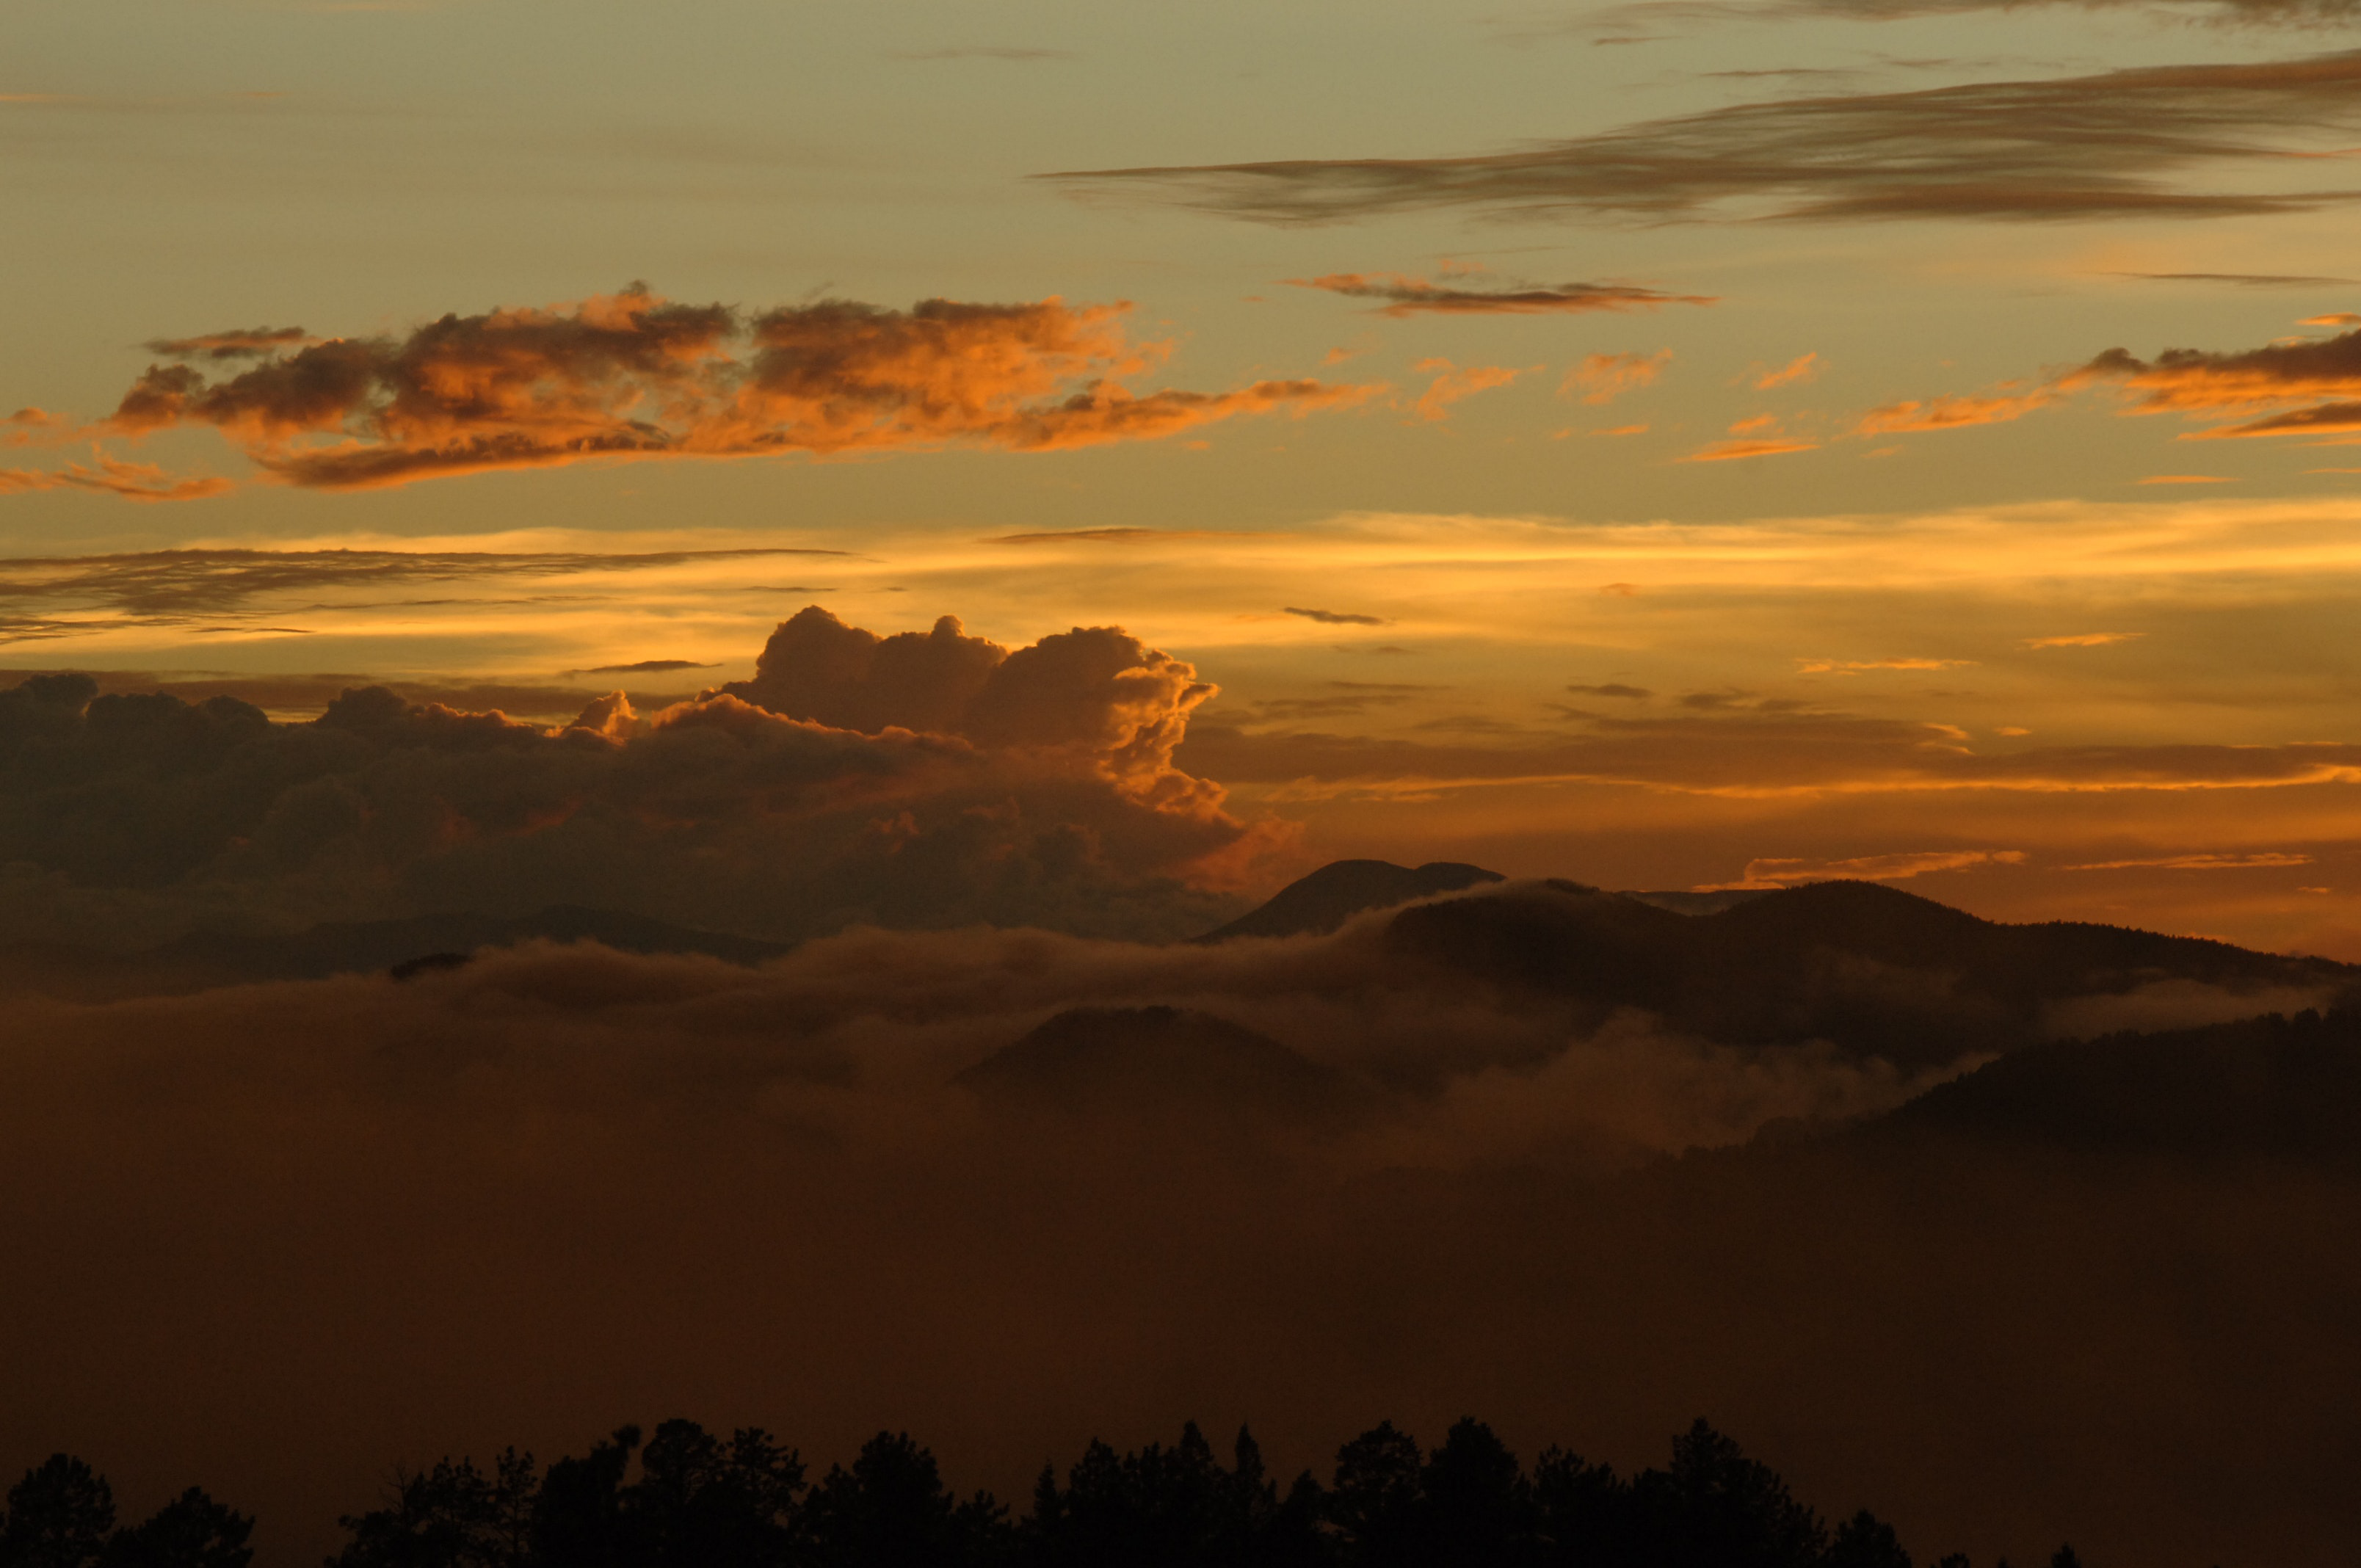

In [13]:
# Print the title of the image, located in the 'title' column of the attributes_df dataframe
print(f"Title: {attributes_df.loc[results_img_id]['title']}")

# Print the dimensions of the downloaded image
print(f"Dimensions: {dl_img.size}")

# Display the downloaded image
dl_img

**Define function to resize an image**

In [14]:
def resize_image(img, target_sz=512, divisor=32):
    """
    Resize an image while maintaining the aspect ratio.
    Optionally crop the image to a size that is a multiple of the given divisor.
    """
    # Find the minimum and maximum dimensions of the image
    min_dim = np.argmin(img.size)
    max_dim = np.argmax(img.size)
    
    # Calculate the ratio by which the image should be resized
    ratio = min(img.size)/target_sz
    
    # Create a list to hold the new dimensions of the image
    new_sz = []
    
    # Insert the target size for the minimum dimension
    new_sz.insert(min_dim, target_sz)
    
    # Insert the calculated size for the maximum dimension
    new_sz.insert(max_dim, int(max(img.size)/ratio))
    
    # Resize the image
    img = img.resize(new_sz)
    
    # If a divisor is specified, crop the image to a size that is a multiple of the divisor
    if divisor > 0:
        src_w, src_h = img.size
        width = src_w if src_w%divisor==0 else src_w - src_w%divisor
        height = src_h if src_h%divisor==0 else src_h - src_h%divisor
        img = img.crop(box=(0, 0, width, height))
    
    # Return the resized and possibly cropped image
    return img

**Resize the downloaded image**

New Dimensions: (768, 512)


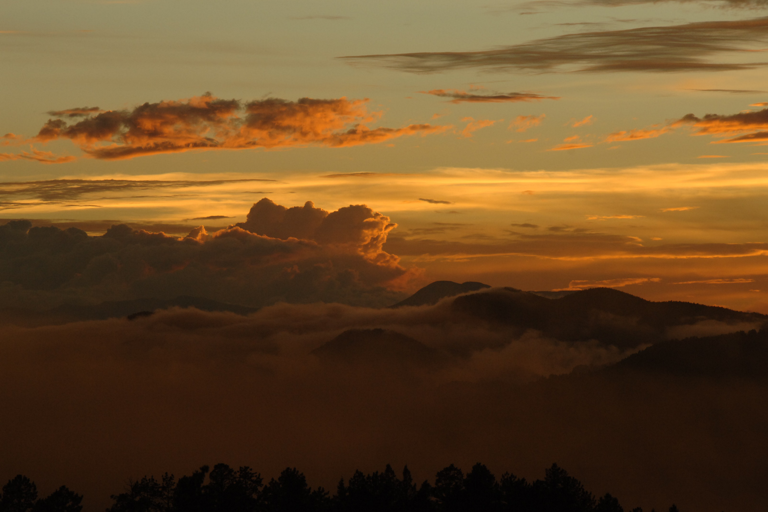

In [15]:
# Resize the image while maintaining the aspect ratio
resized_img = resize_image(dl_img)

# Print the dimensions of the resized image
print(f"New Dimensions: {resized_img.size}")

# Display the resized image
resized_img

**Import dependencies for parallelization**

In [16]:
# Import partial from the functools module
from functools import partial

# Import the os and time modules from the Python Standard Library
import os
import time

# Import the queue module from the concurrent package
import queue

# Import the Collection generic type from the typing module
from typing import Collection

# Import the ThreadPoolExecutor and ProcessPoolExecutor classes from the concurrent.futures module
# and alias them as tpe and ppe, respectively
from concurrent.futures import ThreadPoolExecutor as tpe
from concurrent.futures import ProcessPoolExecutor as ppe

# Import the as_completed function from the concurrent.futures module
from concurrent.futures import as_completed

# Import progress_bar from the fastprogress module
from fastprogress import progress_bar

**Define function to execute a function on elements of an array in parallel**

In [17]:
def parallel(func, arr:Collection, max_workers:int=None, leave=False, use_threads=True):
    """
    Based on the old parallel function in the fastai library
    This function runs the input function `func` in parallel on the objects in the input collection `arr`. 
    It uses a maximum of `max_workers` CPU cores, and will use all available cores if `max_workers` is not specified.
    The `leave` parameter determines whether to leave the progress bar on the screen after completion.
    The `use_threads` parameter determines whether to use threads or processes for parallel execution.
    The function returns the results of applying `func` to each element in `arr` as a list.
    """
    # If no value is provided for the `max_workers` parameter, use the number of CPUs on the system.
    max_workers = os.cpu_count() if max_workers is None else max_workers
    # If `max_workers` is less than 2, we cannot parallelize the computation, so we simply apply the function
    # to each element in the input collection and return the results.
    if max_workers<2: 
        results = [func(o) for o in progress_bar(arr, total=len(arr), leave=leave)]
    else:
        # If `use_threads` is set to `True`, use a thread pool executor for parallelization.
        # Otherwise, use a process pool executor.
        executor = tpe(max_workers) if use_threads == True else ppe(max_workers)
        # Use the executor to parallelize the computation.
        with executor:
            futures = [executor.submit(func,o) for o in arr]
            results = []
            # Use a progress bar to track the progress of the computation.
            for f in progress_bar(as_completed(futures), total=len(arr), leave=leave):
                results.append(f.result())
    # Return the results of the computation.
    if any([o is not None for o in results]): return results

**Define function to apply to an array of image IDs**

In [18]:
def array_func(img_id, scraper, save_dir, target_sz=512, divisor=32, img_fmt='JPEG', quality=100):
    """
    This function downloads an image from the Pexels website using a given `img_id` and `scraper` object, 
    resizes the image to a specified size using the `resize_image` function, and saves the resized image 
    to a specified directory.
    """
    # Download the image from the Pexels website using the given `img_id` and `scraper` object.
    dl_img = download_img(img_id, scraper)
    
    # If the download failed, skip the rest of the function.
    if dl_img is None: return
    
    # Resize the image using the `resize_image` function.
    resized_img = resize_image(dl_img, target_sz=target_sz, divisor=divisor)
    
    # Construct the path where the resized image should be saved.
    save_path = Path(save_dir/f"{img_id}.{img_fmt.lower()}")
    
    # Save the resized image to the specified directory using the specified image format and quality settings.
    resized_img.save(save_path, img_fmt, quality=quality)

**Define save directory**

In [19]:
# Create a `Path` object for the directory that will be used to save the images.
save_dir = Path(f"./pexels_{tag_term.replace(' ', '-')}")

# Create the directory if it does not already exist.
save_dir.mkdir(parents=True, exist_ok=True)

# Print the `Path` object for the save directory.
save_dir

Path('pexels_golden-hour')

**Test array function**

In [20]:
# Use the `array_func` function to download and save the first image in the `results_df_img_ids` list.
array_func(results_df_img_ids[0], scraper, save_dir)

# Use the `get_image_files` function to get a list of paths to the images that were saved in the specified directory.
dl_img_paths = get_image_files(save_dir)

# Display the paths of the saved images using a Pandas DataFrame.
pd.DataFrame(list(dl_img_paths))

0
0  pexels_golden-hour/3157917.jpeg

**View downloaded image**

Title: Photo Of Sunset During Dawn


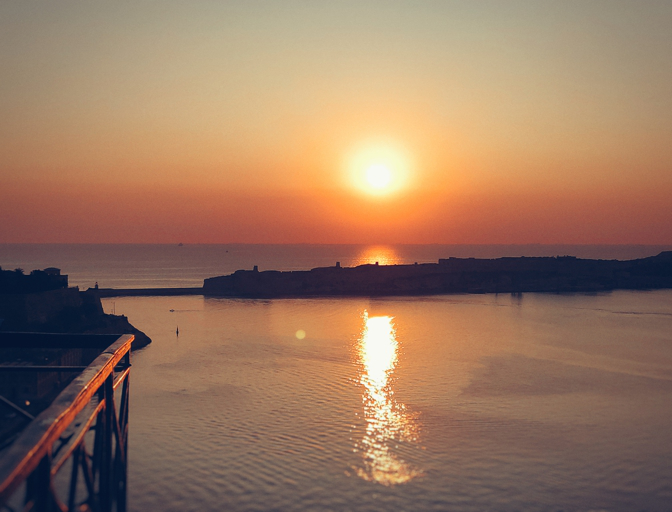

In [21]:
# Get the the path to the downloaded image
dl_img_path = dl_img_paths[0]

# Open the downloaded image
dl_img = Image.open(dl_img_path)

# Print the title of the image, located in the 'title' column of the attributes_df dataframe
print(f"Title: {attributes_df.loc[int(dl_img_path.stem)]['title']}")

# Display the downloaed image
dl_img

**Download images in parallel**

In [22]:
# Set the target size for the images that will be downloaded.
target_sz = 512

# Create a partial function that has the `scraper`, `save_dir`, and `target_sz` parameters already set.
partial_func = partial(array_func, scraper=scraper, save_dir=save_dir, target_sz=target_sz)

# Use the `parallel` function to download and save the images in the `results_df_img_ids` list in parallel.
parallel(func=partial_func, arr=results_df_img_ids)

Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!Download failed!

Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download faile

Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download failed!
Download faile

**Get downloaded image paths**

In [23]:
# Use the `get_image_files` function to get a list of paths to the images that were saved in the specified directory.
dl_img_paths = get_image_files(save_dir)

# Print the number of images that were downloaded.
print(f"Downloaded Images: {len(dl_img_paths)}")

# Create a DataFrame containing the paths of the saved images and display the first few rows of the DataFrame.
pd.DataFrame(list(dl_img_paths)).head()

Downloaded Images: 500


0
0  pexels_golden-hour/1227596.jpeg
1  pexels_golden-hour/1354285.jpeg
2  pexels_golden-hour/1643758.jpeg
3  pexels_golden-hour/1738675.jpeg
4  pexels_golden-hour/1885793.jpeg